Kaggle competition
#### House Prices: Advanced Regression Techniques
Predict sales prices with linear regression, lasso, random forests and gradient boosting

# Machine learning part

### Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/train_enc.csv')
df.head(2)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,TotalSF,TotalBaths,Age when Sold,SalePrice
0,0,0,0,1,0,0,0,0,1,0,...,8,0,2003.0,2.0,0,61,4276.0,3.5,5,208500
1,0,0,0,1,0,0,0,0,1,0,...,6,1,1976.0,2.0,298,0,3786.0,2.5,31,181500


In [3]:
df.shape

(1449, 192)

## Train Test Split

Test split training data and use test_enc.csv as validation.

In [4]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Creating a Model

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import median_absolute_error, r2_score

In [8]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
lm = LinearRegression()
lm.fit(X_train,y_train)
preds_lm = lm.predict(X_test)

### Valuating the model

In [10]:
from sklearn import metrics
from sklearn.metrics import r2_score, explained_variance_score

In [11]:
print('R-squared', r2_score(y_test, preds_lm)) # accounts for the variation
print('MAE:', metrics.mean_absolute_error(y_test, preds_lm))
print('MSE:', metrics.mean_squared_error(y_test, preds_lm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds_lm))) # directly comparable witht data, $

R-squared 0.8856687215269987
MAE: 17329.58080291628
MSE: 641993752.0681148
RMSE: 25337.59562523869


In [12]:
df['SalePrice'].describe()

count      1449.000000
mean     178281.013112
std       71938.946382
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      213000.000000
max      485000.000000
Name: SalePrice, dtype: float64

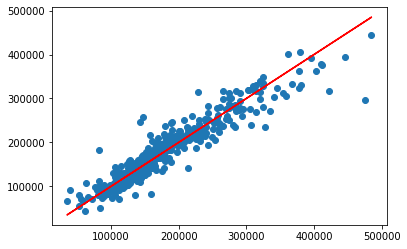

In [13]:
# Our predictions
plt.scatter(y_test, preds_lm)

# Perfect predictions
plt.plot(y_test, y_test,'r')

In [14]:
# Test data real sale price dataframe
test_price_df = pd.DataFrame(y_test).rename(columns={'SalePrice': 'Test Y'})
test_price_df.head(2)

,Test Y
768,114500
1130,196000


In [15]:
# Predicted prices dataframe
preds_reshape = pd.Series(preds_lm.reshape(435,))
preds = pd.DataFrame(preds_reshape, columns = ['Predicted'])
preds.head()

,Predicted
0,98401.580710
1,207564.368546
2,107788.947937
3,246719.934771
4,324942.924429


In [16]:
# Merge real price and predicted price dataframes
compare_price_df = pd.merge(test_price_df, preds, how = 'inner', left_index = True, right_index = True)
compare_price_df.head(5)

,Test Y,Predicted
383,240000,214783.795681
389,119000,204416.279438
90,109900,88252.889755
224,112000,94800.632752
18,159000,302286.640538


In [17]:
# Add a new column with error in prediction compared
compare_price_df['Error'] = compare_price_df['Test Y'] - compare_price_df['Predicted']

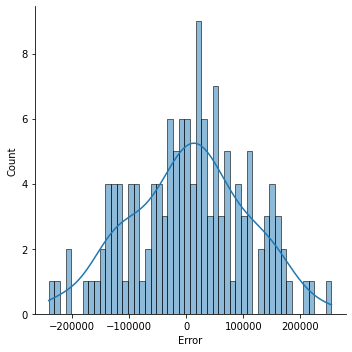

In [18]:
sns.displot(compare_price_df['Error'], bins = 50, kde = True)
# We see errors are normally distributed

## Predicting on test_enc.csv
#### Predicting house prices on new data

In [19]:
test = pd.read_csv('data/test_enc.csv')

In [20]:
test.shape

(1459, 192)

In [21]:
test_X = test.drop('Id', axis=1)

In [22]:
single_house = test_X.iloc[0]

In [23]:
single_house = single_house.values.reshape((1,191))

In [24]:
lm.predict(single_house)

array([105772.29892226])

## Predict on all new houses

In [25]:
model_predictions = lm.predict(test_X)

In [26]:
model_predictions.shape

(1459,)

#### Add Id to predicted prices for submission file

In [27]:
sub = pd.DataFrame({'Id': test['Id'], 'SalePrice': model_predictions})
sub.head()

,Id,SalePrice
0,1461,105772.298922
1,1462,157407.329336
2,1463,177529.981944
3,1464,187785.544090
4,1465,229284.005117


## Output submission file

In [28]:
sub.to_csv('data/my_submission_1_lm.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
